In [1]:
from utilities import *

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = load_dataset("Train")

Loaded 100 subjects


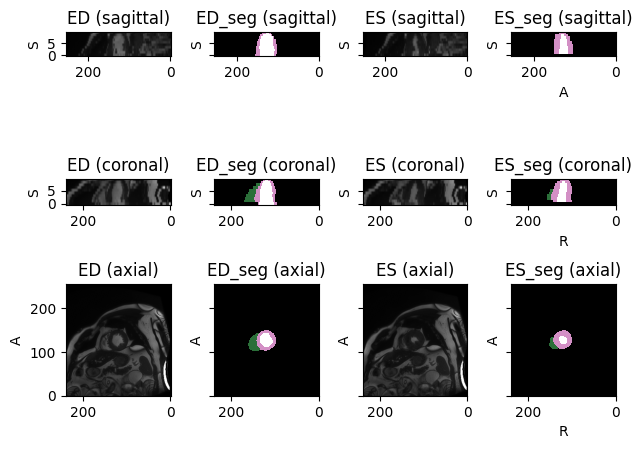

In [3]:
dataset[20].plot()

In [4]:
X,y = create_features_matrix(dataset, category=True)

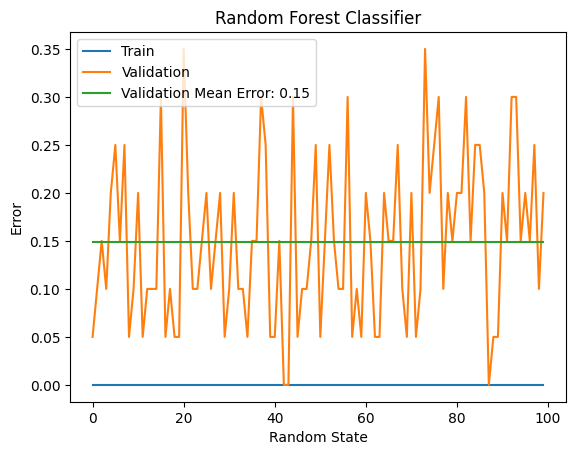

In [35]:
K = 100
train_errors = []
val_errors = []
for i in range(K):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
    model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10)
    model.fit(X_train, y_train)
    train_errors.append(1 - model.score(X_train, y_train))
    val_errors.append(1 - model.score(X_val, y_val))

mean_val_error = np.mean(val_errors)
fig = plt.figure()
plt.plot(range(K), train_errors, label="Train")
plt.plot(range(K), val_errors, label="Validation")
plt.plot(range(K), [mean_val_error]*K, label=f"Validation Mean Error: {mean_val_error:.2f}")
plt.title("Random Forest Classifier")
plt.xlabel("Random State")
plt.ylabel("Error")
plt.legend()
plt.show()

In [28]:
clf = RandomForestClassifier().fit(X, y)
print(clf.score(X, y))

1.0


Loaded 50 subjects


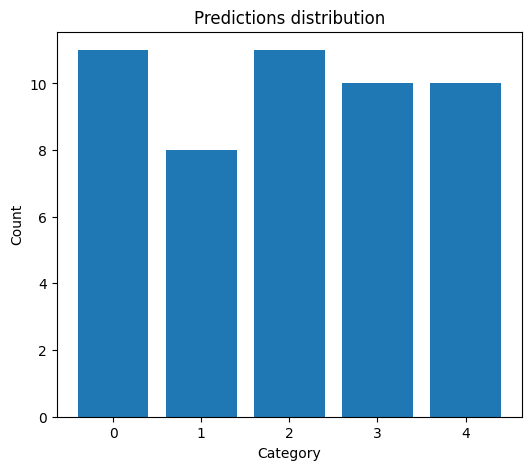

Submission file submission.csv created


In [11]:
submission(clf, "submission")

In [2]:
dataset_test = load_dataset("Test",test_from_file=True)

Loaded 50 subjects
